<h2><a href="https://leetcode.com/problems/longest-continuous-subarray-with-absolute-diff-less-than-or-equal-to-limit">1438. Longest Continuous Subarray With Absolute Diff Less Than or Equal to Limit</a></h2><h3>Medium</h3><hr><p>Given an array of integers <code>nums</code> and an integer <code>limit</code>, return the size of the longest <strong>non-empty</strong> subarray such that the absolute difference between any two elements of this subarray is less than or equal to <code>limit</code><em>.</em></p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [8,2,4,7], limit = 4
<strong>Output:</strong> 2 
<strong>Explanation:</strong> All subarrays are: 
[8] with maximum absolute diff |8-8| = 0 &lt;= 4.
[8,2] with maximum absolute diff |8-2| = 6 &gt; 4. 
[8,2,4] with maximum absolute diff |8-2| = 6 &gt; 4.
[8,2,4,7] with maximum absolute diff |8-2| = 6 &gt; 4.
[2] with maximum absolute diff |2-2| = 0 &lt;= 4.
[2,4] with maximum absolute diff |2-4| = 2 &lt;= 4.
[2,4,7] with maximum absolute diff |2-7| = 5 &gt; 4.
[4] with maximum absolute diff |4-4| = 0 &lt;= 4.
[4,7] with maximum absolute diff |4-7| = 3 &lt;= 4.
[7] with maximum absolute diff |7-7| = 0 &lt;= 4. 
Therefore, the size of the longest subarray is 2.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [10,1,2,4,7,2], limit = 5
<strong>Output:</strong> 4 
<strong>Explanation:</strong> The subarray [2,4,7,2] is the longest since the maximum absolute diff is |2-7| = 5 &lt;= 5.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> nums = [4,2,2,2,4,4,2,2], limit = 0
<strong>Output:</strong> 3
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= nums.length &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= nums[i] &lt;= 10<sup>9</sup></code></li>
	<li><code>0 &lt;= limit &lt;= 10<sup>9</sup></code></li>
</ul>


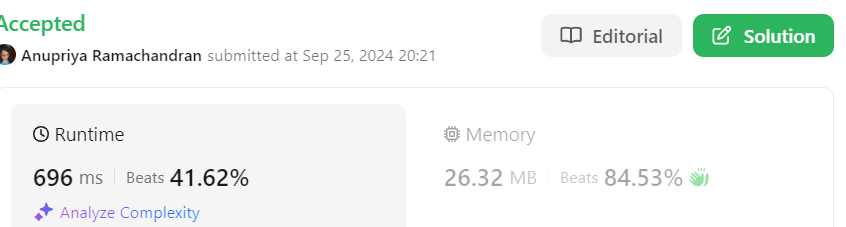

In [2]:
from collections import deque
from typing import List

class Solution:
    def longestSubarray(self, nums: List[int], limit: int) -> int:
        start = 0
        max_length = 0

        min_queue = deque()
        max_queue = deque()

        for end in range(len(nums)):
            while min_queue and nums[min_queue[-1]] >= nums[end]:
                min_queue.pop()
            min_queue.append(end)
            
            while max_queue and nums[max_queue[-1]] <= nums[end]:
                max_queue.pop()
            max_queue.append(end)

            while min_queue and max_queue and  (nums[max_queue[0]] - nums[min_queue[0]] > limit):
                start += 1

                if min_queue[0] < start:
                    min_queue.popleft()

                if max_queue[0] < start:
                    max_queue.popleft()
       
            max_length = max(max_length, end - start + 1)

        return max_length